In [4]:
import ils.dirichletMixtures as dm
import ils.agglomerativeClustering as hc
import ils.utils as ut
import ils.cfsdp as cfs
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import random

In [5]:
ag_data = pd.read_csv("dataset/Ag_features_normalised.csv")
ag_data = ag_data[['popFCC', 'popHCP', 'popICOS', 'SCN3', 'SCN4', 'SCN5', 
'SCN6', 'SCN7', 'SCN8', 'SCN9', 'SCN10', 'popSurface', 'coordNumberNormalised']]
nd_data = pd.read_csv('dataset/ND_finalClusters.csv')
nd_data = nd_data[['H_conc', 'HCP_conc', 'FCC_conc', 'F_111', 'F_110', 'F_100',
       'Sphericity', 'CC_coord', 'sp1', 'sp2', 'sp2x', 'sp3', 'dCC', 'dCCe',
       'aCCC', 'aCCCe', 'D_nm']]
X = ut.synthetic_data()

In [6]:
X_embedded = nd_data.copy()
X_embedded = TSNE(n_components=2, perplexity=30, random_state=42, verbose=1).fit_transform(X_embedded)
X_embedded = pd.DataFrame(X_embedded, columns = ['x', 'y'])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.000s...
[t-SNE] Computed neighbors for 500 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 0.267793
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.400772
[t-SNE] KL divergence after 1000 iterations: 0.221010


In [7]:
def test_hc(dataset, k, X_embedded, low=60, high=95):
    Z = hc.get_linkage(dataset, method='single', metric='euclidean')
    label = hc.choose_best_cut(Z, k, low=low, high=high)
    ac, remain = hc.split_data(label, k)
    index = []
    for i in range(len(ac)):
        index.append(random.choice(ac[i]))
    print(index)
    newL, count = cfs.applyILS(dataset, index)
    cfs.draw_ILS(count, X_embedded, newL, ut.colors)
    cfs.plot_centroid(X_embedded, index)

100.0
0.26666666666666666
57.333333333333336
99.86666666666667
100.0
83.73333333333333
83.73333333333333
Cut height: 0.13278265557379332
Top 2 label data is of 83.73333333333333%
[562, 300]
The number of clusters: 2
Iterative label spreading took 9.4s to label 1500 points


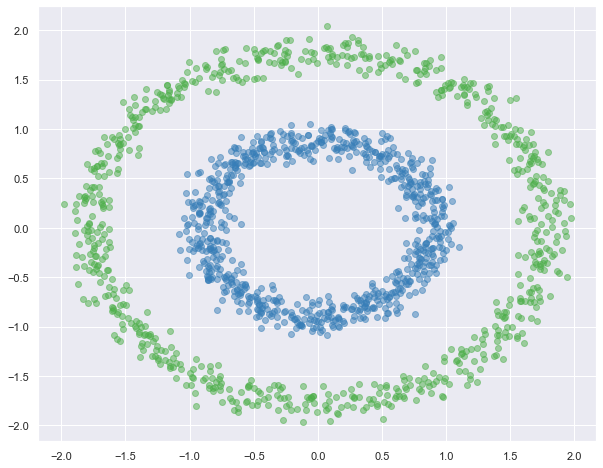

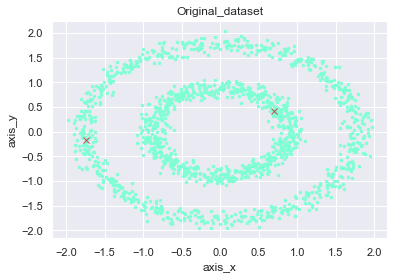

In [8]:
test_hc(X[0], 2, X[0])

100.0
0.33333333333333337
97.6
97.6
100.0
100.0
99.8
Cut height: 0.13278265557379332
Top 2 label data is of 97.6%
[1457, 221]
The number of clusters: 2
Iterative label spreading took 8.8s to label 1500 points


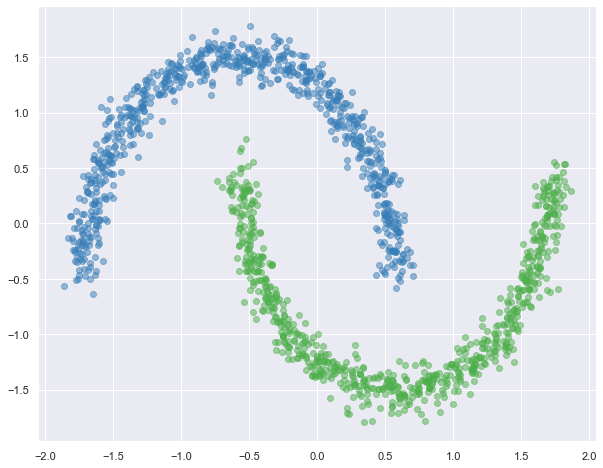

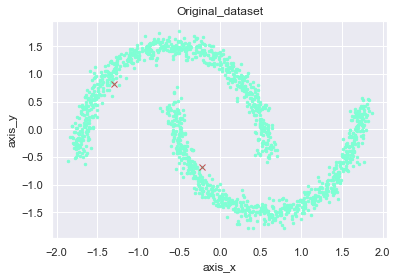

In [9]:
test_hc(X[1], 2, X[1], high=99.1)

99.8
0.4
68.66666666666667
68.66666666666667
94.39999999999999
94.39999999999999
98.2
92.26666666666667
Cut height: 0.13278265557379332
Top 3 label data is of 94.39999999999999%
[425, 198, 965]
The number of clusters: 3
Iterative label spreading took 8.6s to label 1500 points


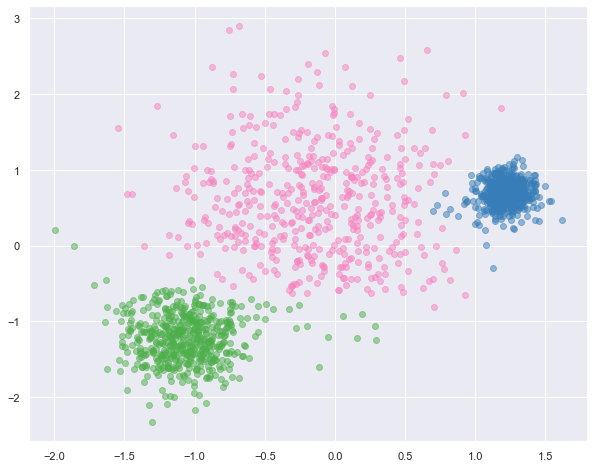

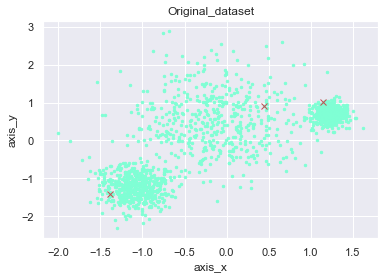

In [10]:
test_hc(X[2], 3, X[2])

100.0
0.46666666666666673
92.33333333333333
92.33333333333333
99.2
99.86666666666667
97.6
Cut height: 0.13278265557379332
Top 3 label data is of 92.33333333333333%
[642, 780, 397]
The number of clusters: 3
Iterative label spreading took 8.8s to label 1500 points


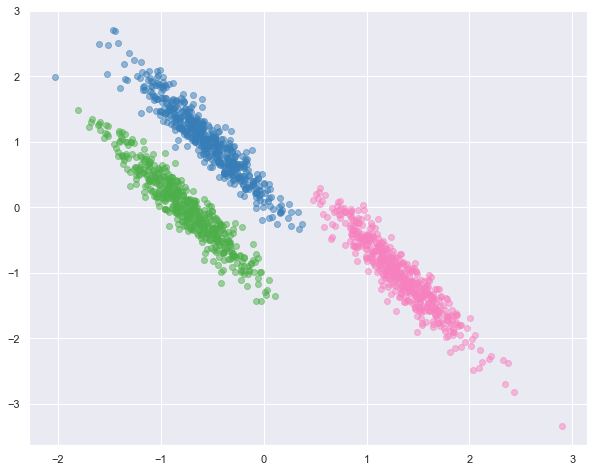

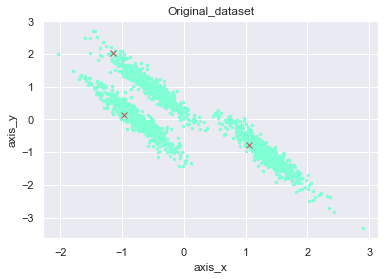

In [11]:
test_hc(X[3], 3, X[3])

100.0
0.4
97.2
97.2
100.0
99.33333333333333
99.93333333333332
98.93333333333332
98.93333333333332
Cut height: 0.13278265557379332
Top 3 label data is of 98.93333333333332%
[1151, 1268, 999]
The number of clusters: 3
Iterative label spreading took 8.9s to label 1500 points


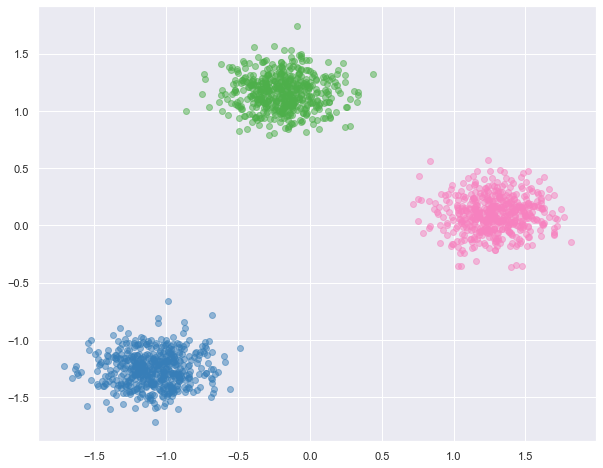

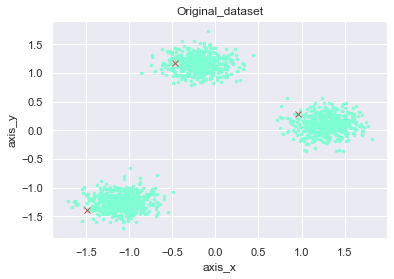

In [12]:
test_hc(X[4], 3, X[4], high=99)

Number of components:  12


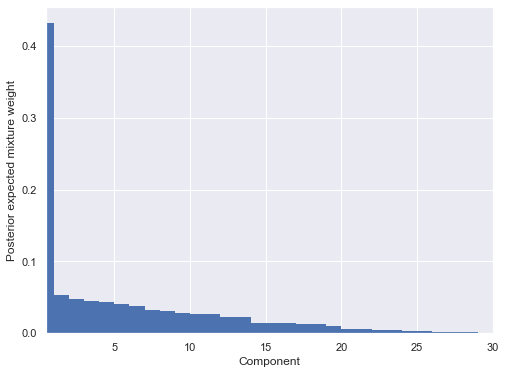

In [13]:
dm.plot_mixtures(30, nd_data, 0.8)

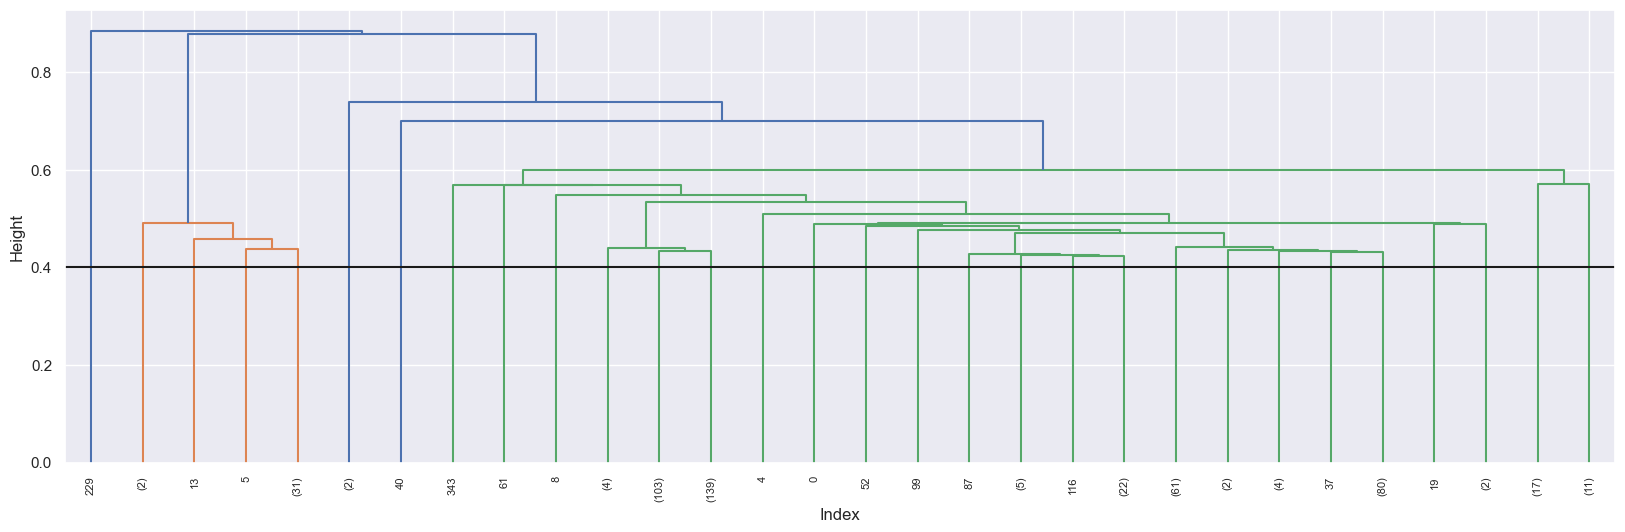

In [14]:
Z = hc.get_linkage(nd_data)
hc.plot_dendrogram(Z, nd_data, 0.4)

In [15]:
label = hc.cut_height(Z, 0.4)
labels = hc.calculate_topklabel(label, 8)

Top 8 label data is of 87.0%


In [16]:
ac, remain = hc.split_data(label, 8)
index = []
for i in range(len(ac)):
    index.append(random.choice(ac[i]))
index

[353, 106, 471, 213, 397, 176, 43, 64]

The number of clusters: 8
Iterative label spreading took 1.7s to label 500 points


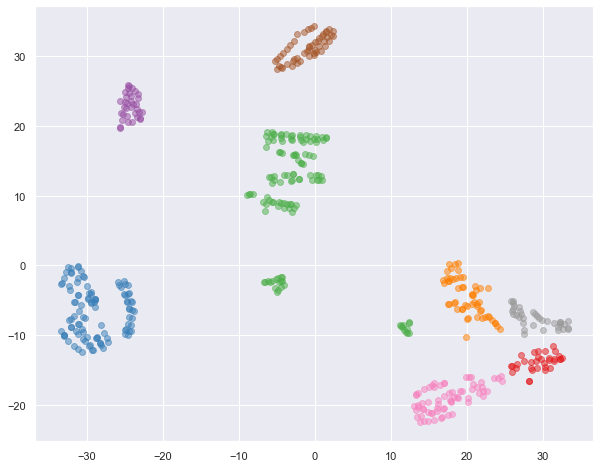

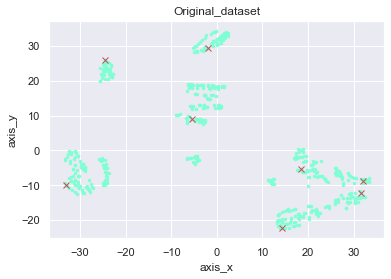

In [17]:
newL, count = cfs.applyILS(nd_data, index)
cfs.draw_ILS(count, X_embedded, newL, ut.colors)
cfs.plot_centroid(X_embedded, index)

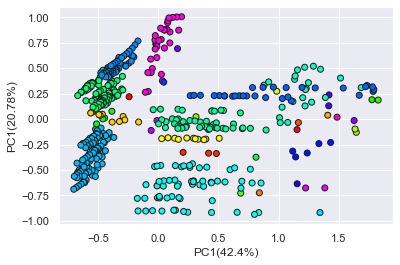

In [18]:
hc.pca_vision(nd_data, 0.95, label)